# Data cleaning and analysis

In [38]:
# Importing libraries:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os


In [27]:
# Setting the notebook directory to the project root: (from delay_prediction)
if "ORIGINAL_WORKDIR" not in globals():
    ORIGINAL_WORKDIR = Path().resolve()  # Save the initial notebook directory

# Move up one level from the original location
parent_dir = ORIGINAL_WORKDIR.parent

# Change to the correct directory
os.chdir(parent_dir)

print(f"Working directory set to: {os.getcwd()}")

Working directory set to: /Users/zsuzsikoos/Desktop/DS_Project


In [28]:
# Save the requirements.txt for reproducibility (from delay_prediction))
!pip freeze > requirements.txt
print("Wrote requirements.txt")

Wrote requirements.txt


In [29]:
# Importing data and reading it into df
PROJECT_ROOT = Path.cwd()
file_name = 'data.csv' 
data_path = PROJECT_ROOT / 'data' / 'raw' / file_name
df = pd.read_csv(data_path)
df.head()

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024]
0,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,4.06172661982306
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,42647492
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,..
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,..
4,Albania,ALB,Urban population growth (annual %),SP.URB.GROW,0.0471709154127424


## Cleaning:

In [30]:
#dropping missing values after identifying them
df.replace('..', np.nan, inplace=True)
df = df[~df['2024 [YR2024]'].isna()]


In [31]:
df.dtypes

Country Name     object
Country Code     object
Series Name      object
Series Code      object
2024 [YR2024]    object
dtype: object

In [32]:
#transform to numeric
df = df.astype({'2024 [YR2024]': 'float'})
df.dtypes

Country Name      object
Country Code      object
Series Name       object
Series Code       object
2024 [YR2024]    float64
dtype: object

In [33]:
df #checking df

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024]
0,Afghanistan,AFG,Urban population growth (annual %),SP.URB.GROW,4.061727e+00
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,4.264749e+07
4,Albania,ALB,Urban population growth (annual %),SP.URB.GROW,4.717092e-02
5,Albania,ALB,"Population, total",SP.POP.TOTL,2.714617e+06
7,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,1.001163e+04
...,...,...,...,...,...
1057,Upper middle income,UMC,"Population, total",SP.POP.TOTL,2.818128e+09
1059,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,1.096182e+04
1060,World,WLD,Urban population growth (annual %),SP.URB.GROW,1.719231e+00
1061,World,WLD,"Population, total",SP.POP.TOTL,8.142056e+09


## Exploratory data analysis

Let's look at the GDP of different regions in the world and visualize them.

In [34]:
df.loc[(df['Country Name'] == 'Sub-Saharan Africa') & (df['Series Name'] == 'GDP per capita (current US$)')]

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024]
1047,Sub-Saharan Africa,SSF,GDP per capita (current US$),NY.GDP.PCAP.CD,1516.35448


In [35]:
regions = [
    'Sub-Saharan Africa', 
    'Latin America & Caribbean', 
    'Central Europe and the Baltics', 
    'North America', 
    'South Asia'
]

gdp_df= df.loc[(df['Country Name'].isin(regions)) & (df['Series Name'] == 'GDP per capita (current US$)')]
gdp_df

,Country Name,Country Code,Series Name,Series Code,2024 [YR2024]
887,Central Europe and the Baltics,CEB,GDP per capita (current US$),NY.GDP.PCAP.CD,24543.304055
963,Latin America & Caribbean,LCN,GDP per capita (current US$),NY.GDP.PCAP.CD,11044.679656
1007,North America,NAC,GDP per capita (current US$),NY.GDP.PCAP.CD,82406.478866
1039,South Asia,SAS,GDP per capita (current US$),NY.GDP.PCAP.CD,2691.645563
1047,Sub-Saharan Africa,SSF,GDP per capita (current US$),NY.GDP.PCAP.CD,1516.354480


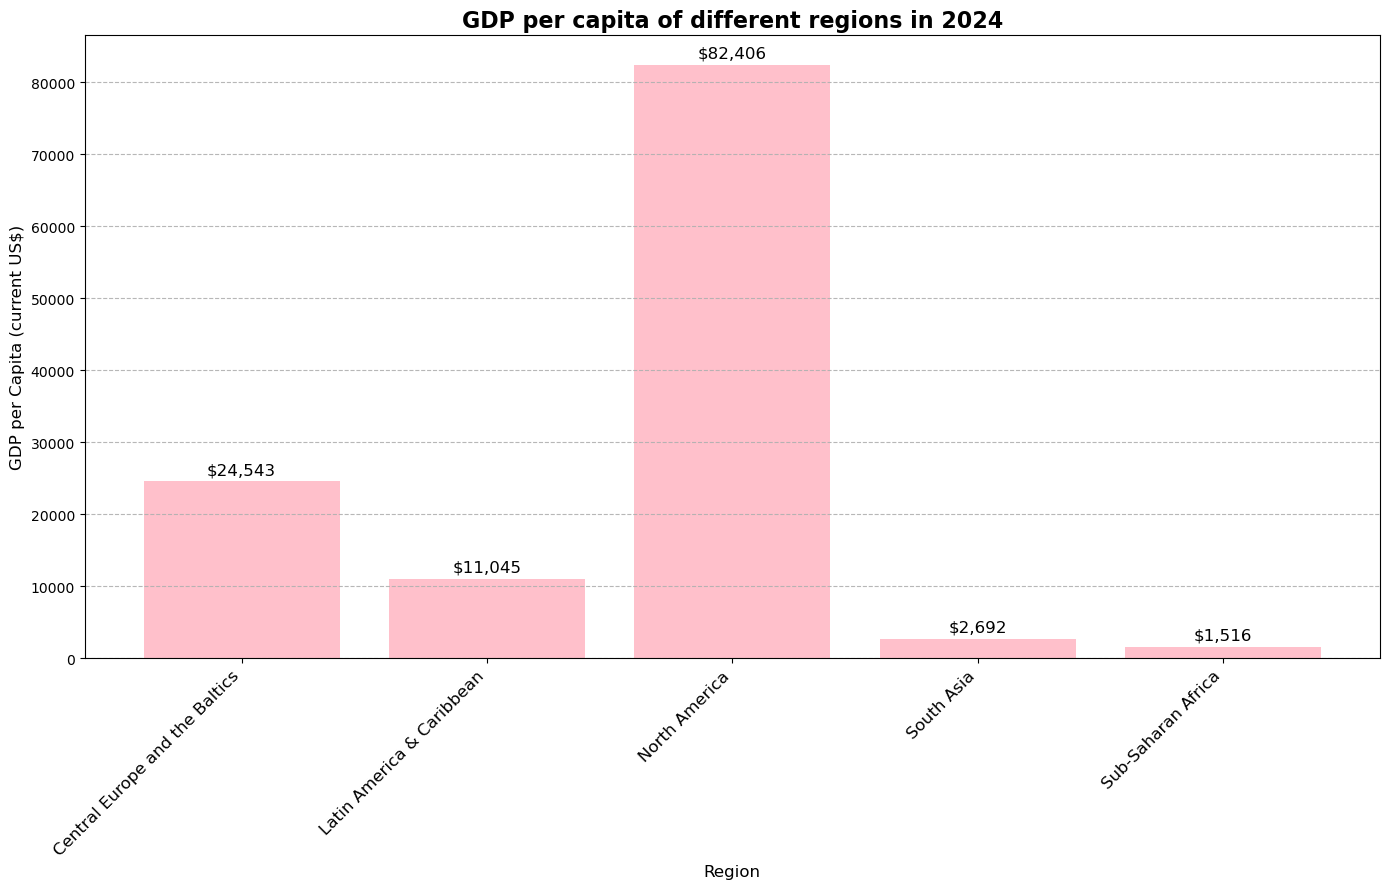

In [48]:
#plot the data
plt.figure(figsize=(14, 9)) 

bars = plt.bar(
    gdp_df['Country Name'], 
    gdp_df['2024 [YR2024]'],
    color='pink' 
)
#fomatting the chart
plt.bar_label(bars, fmt='${:,.0f}', padding=3, fontsize=12, color='black')
plt.xlabel('Region', fontsize=12)
plt.ylabel('GDP per Capita (current US$)', fontsize=12)
plt.title('GDP per capita of different regions in 2024', fontsize=16, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()

#save output
output_path = Path.cwd() / 'output' / 'regional_gdp_comparison.png'
plt.savefig(output_path)

plt.show()